Linear Regression with Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

The aim of the project:

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

STEP-1 : IMPORTING LIBRARIES

In [5]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

STEP-2: READING DATA

In [8]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Data imported successfully")
dataset.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


STEP -3 :EXPLORING OF DATA

In [12]:
dataset.shape

(25, 2)

Data has 25 rows and 2 columns.


In [13]:
#statistical description

In [14]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [18]:
dataset.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


The data has no null values.


STEP - 4 : VISUALISING DATA

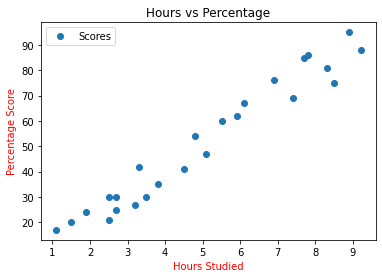

In [21]:
#let's plot our data points on 2-D graph to eyeball our dataset 
#and see if we can manually find any relationship between the data.
#We can create the plot with the following script:
#scatterplot
dataset.plot(x='Hours', y='Scores', style='o',)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied',color='red')
plt.ylabel('Percentage Score',color='red')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [25]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

STEP -5 : SPLIITING OF DATA INTO TRAIN AND TEST

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [41]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


[9.91065648]
2.018160041434683


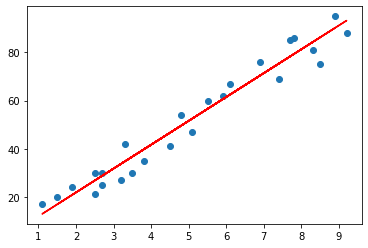

In [42]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
print(regressor.coef_)
print(regressor.intercept_)
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.show()

This means that for every one unit of change in hours studied, the change in the score is about 9.91%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [31]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [32]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Though our model is not very precise, the predicted percentages are close to the actual ones.

TESTING MODEL

In [37]:
hours= 9.25
hours = np.array(hours).reshape(-1,1)

In [39]:
own_pred = regressor.predict(hours)

In [40]:
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


Evaluating the model


The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [43]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


In [44]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.